# Milestone project 1: Heart Disease Model

We will work on a project with structured data. This will be a classifier that will allow us to detect whether or not a patient has a heart disease or not using the available features that we have in our dataset.

## Predcting heart disease using macine learning
This notebook looks into using various Python based librariesin an attempt to build a machine learning model capable of predicting whether or not someone has heard disease based on their medical attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target 1 or 0

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept we'll persue the project

## 4. Featrues

This is where you will get different information about the different columns in the dataset

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Preparing the tools

We're going to use pandas, Matplotlib, and NumPy for data analysis and manipulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



### Loading the data and exploring them

Explore the data and try to learn more about the dataset and become a subject matter expert on the dataset

1. What questions are you trying to solve?
2. What kind of data do we have and how do me treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data? 

In [2]:
df = pd.read_csv("../resources/UCI heart disease dataset.csv")
df.shape

(303, 14)

In [3]:
## Data Exploration

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

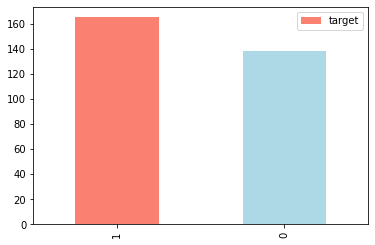

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], legend=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\cos_9\Anaconda3\envs\machine_learning_env\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


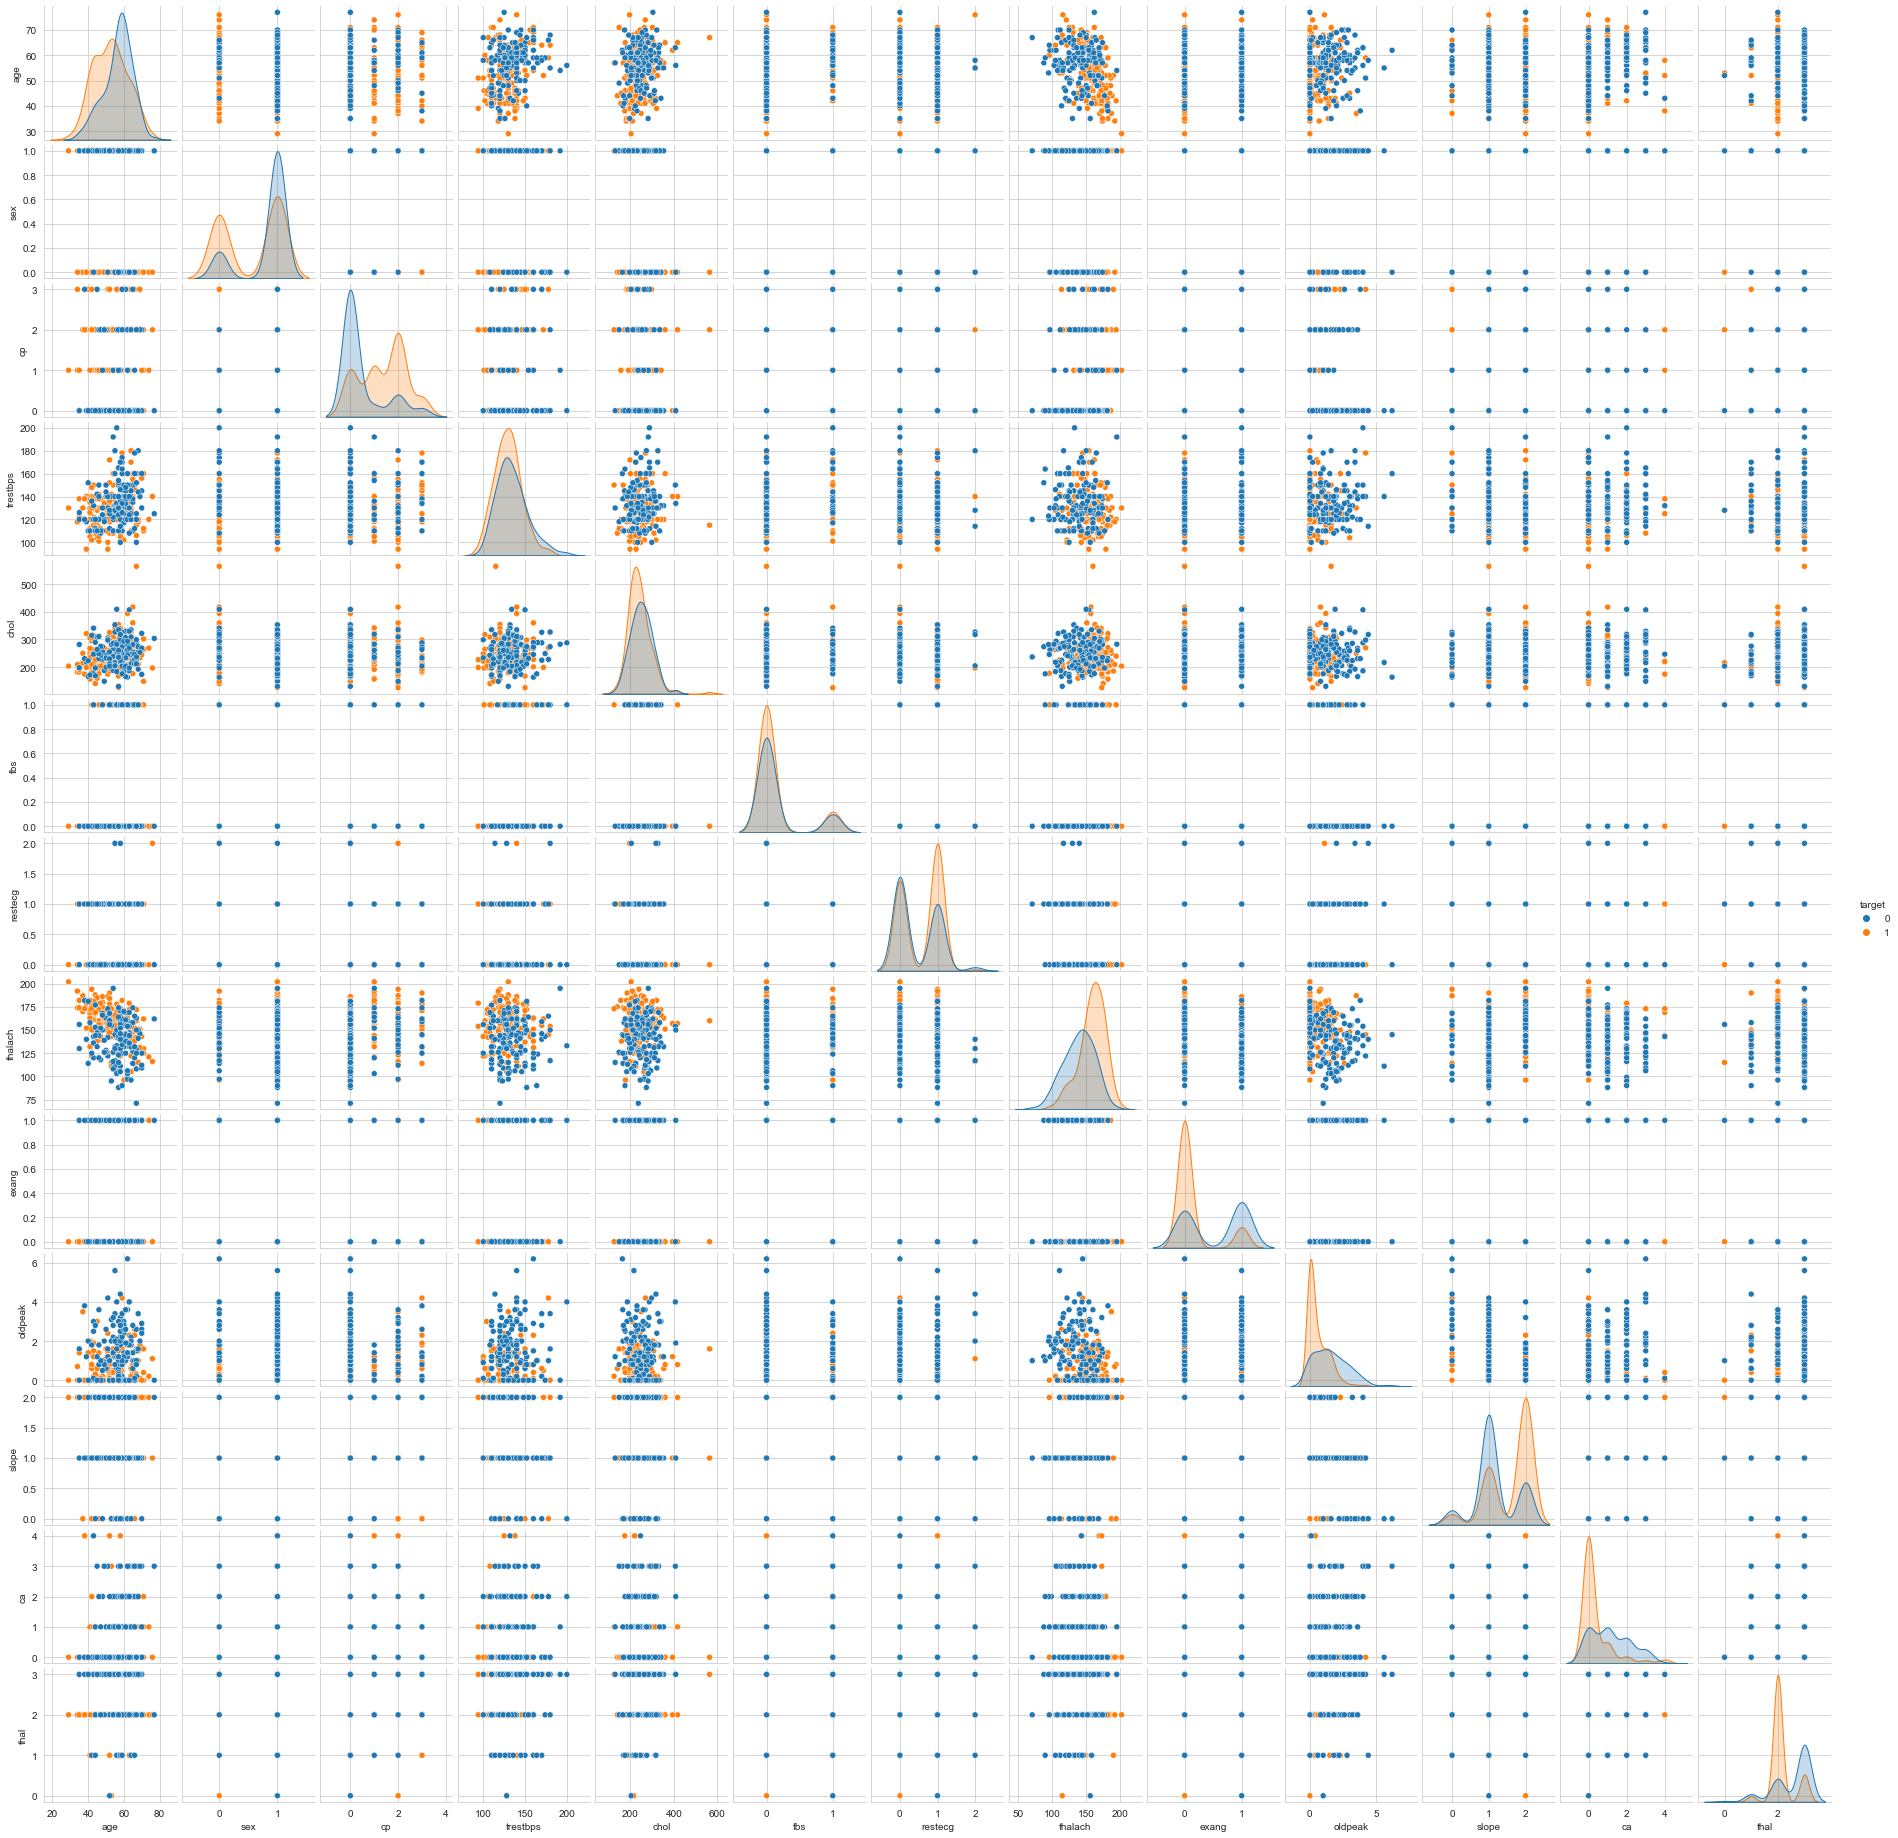

In [10]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="target", size=2);
plt.show()

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df.target, df.sex)
# based on our data, if a new patience arrive, there's around 75% chance to have heart disease if female, and about 60% to have heart
# diease if male (this is a baseline)

sex,0,1
target,,
0,24,114
1,72,93


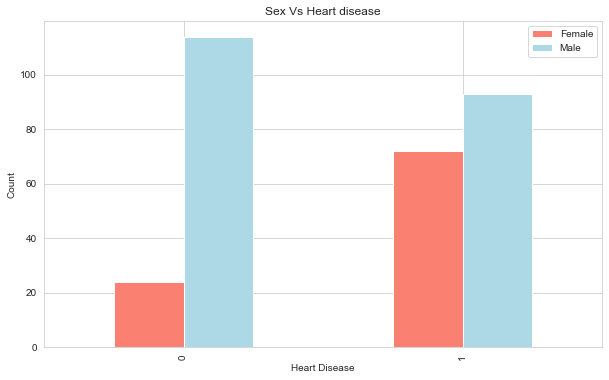

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Sex Vs Heart disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])

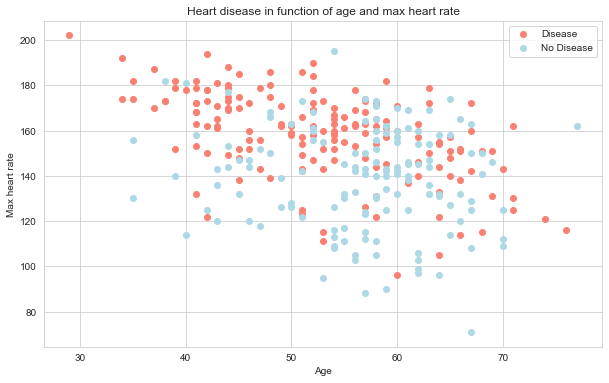

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color="salmon")

plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color="lightblue")

plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"])

<AxesSubplot:ylabel='Frequency'>

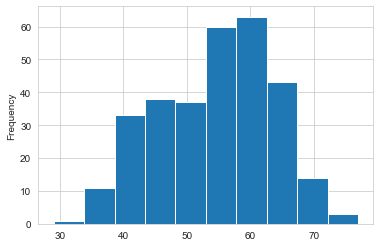

In [15]:
df.age.plot.hist()

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [17]:
df.corr().shape


(14, 14)

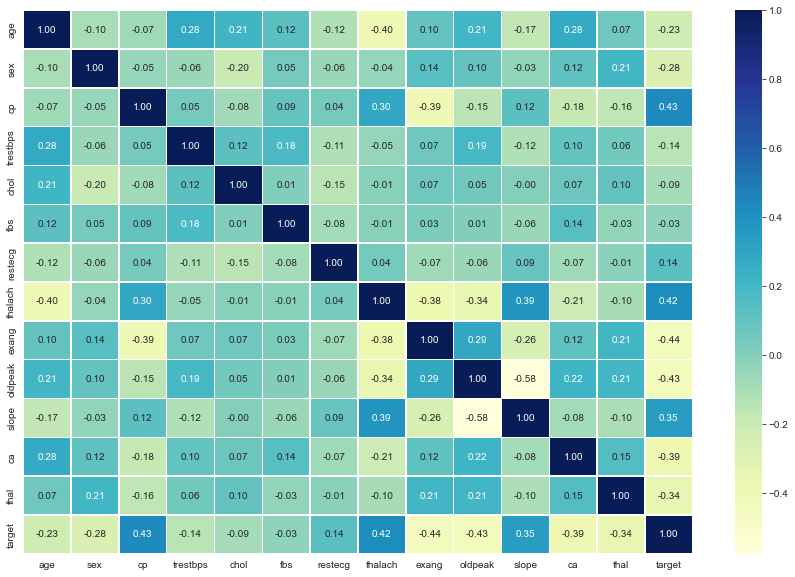

In [18]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

### 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
# Split data into train/test

X = df.drop("target", axis=1)
y = df.target

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Trying a few experiments
Now we have our data split it is time to build our ML model. 

And chose the correct model which would be the one that works best.

Fitting and evaluating:  Logistic Regression
Fitting and evaluating:  KNN
Fitting and evaluating:  Random Forest
The model scores are:
	0. Model Logistic Regression - Score 0.8360655737704918
	1. Model KNN - Score 0.7213114754098361
	2. Model Random Forest - Score 0.7213114754098361



<AxesSubplot:title={'center':'Model accuracy comparison'}>

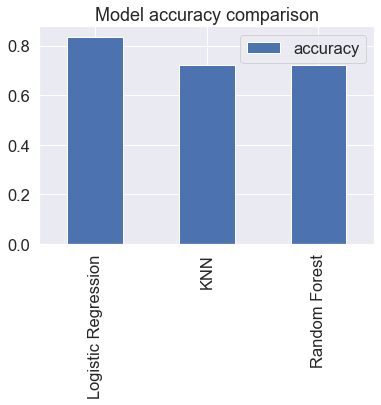

In [108]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models:

def fit_and_score(models: dict, X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.Series, y_test: pd.Series) -> dict:
    """
    Fits and evaluates given machine learning models.
    
    Arguments:
        models: A dictionary of different Scikit-Learn machine learning models
        X_train: Training data with no labels
        X_test: Test data with no labels
        y_train: Training labels
        y_test: Test labels
    
    Returns:
        Dictionary with all the model's scores
    """
    np.random.seed(42)
    model_scores = {}
    for model_name, model in models.items():
        print("Fitting and evaluating: ", model_name)
        
        model.fit(X_train, y_train)
        
        model_scores[model_name] = model.score(X_test, y_test)
        
    return model_scores


model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

print("The model scores are:\n\t", "\t".join([f"{i}. Model {m} - Score {s}\n" for i, (m, s) in enumerate(model_scores.items())]), sep="")
        

model_scores_df = pd.DataFrame(model_scores, index=["accuracy"])
model_scores_df.T.plot.bar(title="Model accuracy comparison")

Now we've got a baseline model, and we know a model's first predictions aren't always what we should base our next steps off, we will look at the following:

* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [37]:
# Let's tune KNN

train_scores = []
test_scores = []

# Tuning neighbors 
knn = KNeighborsClassifier()

for n_neighbors in range(1,21):
    # Set n neighbors
    knn.set_params(n_neighbors=n_neighbors)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Text(0.5, 1.0, 'Model score for different N Neighbors')

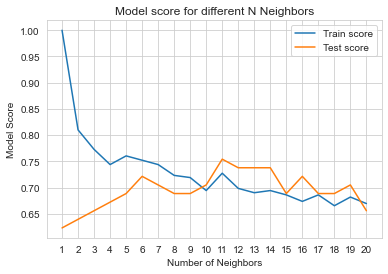

In [39]:
plt.plot(range(1,21), train_scores, label="Train score")
plt.plot(range(1,21), test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.title("Model score for different N Neighbors")

#### Conclusion on KNN

We will discard this model since even at it's best configuration, it performed poorer than the best baseline model, which was Logistic Regression

### Hyper Parameter Tuning with RandomizedSearch CV

We're going to tune:
* `LogisticRegression`
* `RandomForestClassifier`

In [54]:
# Create a hyper parameter grid for Logistic regression

log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}

# Create hyper parameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2, 20, 2), 
           "min_samples_leaf": np.arange(1, 20, 2)}

In [43]:
# Tuning Logistic Regression

np.random.seed(42)

# Setup random hyper paramter search for LR

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid, 
                                 cv=5,
                                 n_iter=20,
                                 verbose=True
                                )

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
print(rs_log_reg.best_params_)
rs_log_reg.score(X_test, y_test)

{'solver': 'liblinear', 'C': 0.23357214690901212}


0.8852459016393442

In [52]:
# Tuning Random Forest classifier

np.random.seed(42)

# Setup Random hyper parameter search for RF classifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
print(rs_rf.best_params_)
rs_rf.score(X_test, y_test)

{'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}


0.8688524590163934

### Hyper Parameter Tuning with Grid Search CV

Since our Logistic Regression model is the best so far, we'll try and improve it further using Grid Search CV

In [57]:
# Setup Grid search CV for Logistic Regression

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True
                         )

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [58]:
print(gs_log_reg.best_params_)
gs_log_reg.score(X_test, y_test)

{'C': 0.20433597178569418, 'solver': 'liblinear'}


0.8852459016393442

## Evaluating our tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Recall
* F1 score

To make comparisons and evaluate our trained model, first we need to make predictions

In [60]:
y_preds = gs_log_reg.predict(X_test)

C:\Users\cos_9\Anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


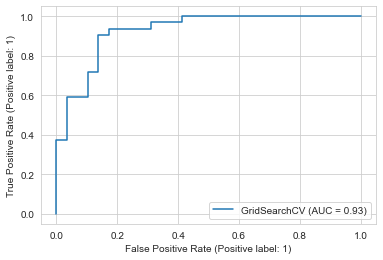

In [61]:
# ROC curve

plot_roc_curve(gs_log_reg, X_test, y_test)

[[25  4]
 [ 3 29]]


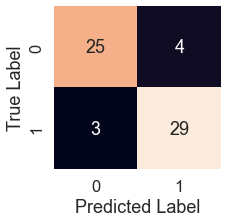

In [65]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap
    
    Arguments:
        y_test: Your test sample
        y_preds: Your predicted values from your model
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
plot_conf_matrix(y_test, y_preds)

In [66]:
# Getting classification report, prescision and cross validation score of precision recall and f1 score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



{'C': 0.20433597178569418, 'solver': 'liblinear'}
0.845
0.821
0.921
0.867


<AxesSubplot:title={'center':'Cross Validated Scores'}>

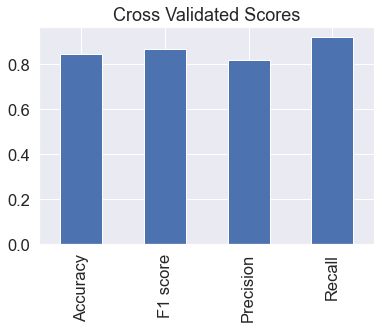

In [83]:
# Check best params
print(gs_log_reg.best_params_)

clf = LogisticRegression(**gs_log_reg.best_params_)

# Cross-validated accuracy

cvc_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cvc_acc = np.mean(cvc_acc)
print(round(cvc_acc, 3))

# Cross-validated precision

cvc_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cvc_prec = np.mean(cvc_prec)
print(round(cvc_prec, 3))

# Cross-validated recall

cvc_rec = cross_val_score(clf, X, y, cv=5, scoring="recall")
cvc_rec = np.mean(cvc_rec)
print(round(cvc_rec, 3))

# Cross-validated f1 score

cvc_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cvc_f1 = np.mean(cvc_f1)
print(round(cvc_f1, 3))

# Plot it

pd.DataFrame(data = [[cvc_acc, cvc_f1, cvc_prec, cvc_rec]], columns=["Accuracy", "F1 score", "Precision", "Recall"], 
             index=["Accuracy"]).T.plot.bar(title="Cross Validated Scores", legend=False)

### Feature importance

Feature importance is another way of asking "which features contributed most to the outcomes of the model and how did they 
contribute??"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our Logistic Regression model.

[[ 0.00316727 -0.86044582  0.66067073 -0.01156993 -0.00166374  0.04386131
   0.31275787  0.02459361 -0.60413038 -0.56862852  0.45051617 -0.63609863
  -0.67663375]]
{'age': 0.0031672721856887734, 'sex': -0.860445816920919, 'cp': 0.6606707303492849, 'trestbps': -0.011569930902919925, 'chol': -0.001663741604035976, 'fbs': 0.04386130751482091, 'restecg': 0.3127578715206996, 'thalach': 0.02459360818122666, 'exang': -0.6041303799858143, 'oldpeak': -0.5686285194546157, 'slope': 0.4505161679452401, 'ca': -0.6360986316921434, 'thal': -0.6766337521354281}


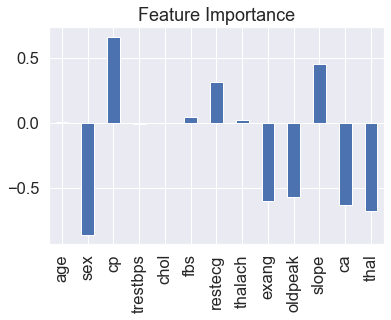

In [111]:
# Fit an instance of Log Regr

clf = LogisticRegression(**gs_log_reg.best_params_)

clf.fit(X_train, y_train)

# Check all coefficients of the features

print(clf.coef_)

# Match coefficients with columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
print(feature_dict)

pd.DataFrame(feature_dict, index=[0]).T.plot.bar(title="Feature Importance", legend=False)

important_features = [key for key, value in feature_dict.items() if abs(value) > 0.01]

In [115]:
np.random.seed(42)

X = df.loc[:, important_features]
y = df.target

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2)

In [116]:
gs_log_reg_reduced_features = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True
                         )

gs_log_reg_reduced_features.fit(X_train_n, y_train_n)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [117]:
gs_log_reg_reduced_features.score(X_test_n, y_test_n)

0.8852459016393442

## 6. Experimentation

If you haven't hit your evaluation metric yet, then ask yourself:

* Could you collect more data??
* Could you try a better model?? 
* Could you improve the current model even further?? 

If your model is good enough though, how do you persist it and implement/share it?